In [6]:
import os
import copy
import numpy as np
import pandas as pd
from PIL import Image
from scipy.spatial.distance import cdist

In [2]:
fd = "/home/jupyter/ai_font/data/exp0717/train_whole/"
file = "교보손글씨2020박도연/교보손글씨2020박도연__우.png"

In [3]:
img = Image.open(fd+file)

In [19]:
where_black = np.where(np.array(img)!=255)

In [33]:
endpoint = np.array([[0, 64]])
points = np.stack(where_black,1)
dist = cdist(endpoint, points, metric='euclidean')

In [34]:
points.shape

(646, 2)

In [35]:
anchor = points[np.argsort(dist.reshape(-1))][:8]
leftpoints = points[np.argsort(dist.reshape(-1))][8:]

In [36]:
noerror = True
len_near = 1
while (len(leftpoints) > 0) & noerror & (len_near>0):
    try:
        dist = cdist(anchor, leftpoints, metric='euclidean')
        wherenear = np.where(np.min(dist,0) < 1.5)[0]
        len_near = len(wherenear)
        anchor = np.concatenate([anchor, leftpoints[wherenear,:]])
        leftpoints = np.delete(leftpoints, wherenear,axis=0)
    except:
        noerror = False


In [37]:
npimg = np.array(img)
npimg[leftpoints[:,0],leftpoints[:,1]] = 255

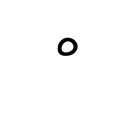

In [38]:
Image.fromarray(npimg)

In [65]:
def vgetter(img):
    where_black = np.where(np.array(img)!=255)
    endpoint = np.array([[0, 64]])
    points = np.stack(where_black,1)
    dist = cdist(endpoint, points, metric='euclidean')
    anchor = points[np.argsort(dist.reshape(-1))][:16]
    leftpoints = points[np.argsort(dist.reshape(-1))][16:]
    noerror = True
    len_near = 1
    while (len(leftpoints) > 0) & noerror & (len_near>0):
        try:
            dist = cdist(anchor, leftpoints, metric='euclidean')
            wherenear = np.where(np.min(dist,0) < 1.5)[0]
            len_near = len(wherenear)
            anchor = np.concatenate([anchor, leftpoints[wherenear,:]])
            leftpoints = np.delete(leftpoints, wherenear,axis=0)
        except:
            noerror = False
    npimg = np.array(img)
    npimg[leftpoints[:,0],leftpoints[:,1]] = 255
    return Image.fromarray(npimg) if len(leftpoints) >0 else None

def hgetter(img):
    where_black = np.where(np.array(img)!=255)
    endpoint = np.array([[64, 0]])
    points = np.stack(where_black,1)
    dist = cdist(endpoint, points, metric='euclidean')
    anchor = points[np.argsort(dist.reshape(-1))][:16]
    leftpoints = points[np.argsort(dist.reshape(-1))][16:]
    noerror = True
    len_near = 1
    while (len(leftpoints) > 0) & noerror & (len_near>0):
        try:
            dist = cdist(anchor, leftpoints, metric='euclidean')
            wherenear = np.where(np.min(dist,0) < 1.5)[0]
            len_near = len(wherenear)
            anchor = np.concatenate([anchor, leftpoints[wherenear,:]])
            leftpoints = np.delete(leftpoints, wherenear,axis=0)
        except:
            noerror = False
    npimg = np.array(img)
    npimg[leftpoints[:,0],leftpoints[:,1]] = 255
    return Image.fromarray(npimg) if len(leftpoints) >0 else None

In [66]:
fd = "/home/jupyter/ai_font/data/exp0717/train_whole/"
file = "교보손글씨2020박도연/교보손글씨2020박도연__가.png"
img = Image.open(fd+file)

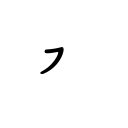

In [67]:
hgetter(img)